<a href="https://colab.research.google.com/github/AbderrahimBend/Abder/blob/master/ProjetSRLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Entrainement du réseau*** 

## Initialisation de la librairie et des paramètres

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

### **Importation du jeu de données**


In [4]:
# Importer Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
path = Path('/content/gdrive/My Drive/asl_alph/asl_alphabet/train');
path

PosixPath('/content/gdrive/My Drive/asl_alph/asl_alphabet/train')

In [0]:
tfms = get_transforms(do_flip=False)

In [0]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=224, bs=bs).normalize(imagenet_stats)

In [0]:
#data.normalize

In [0]:
print(data.classes)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


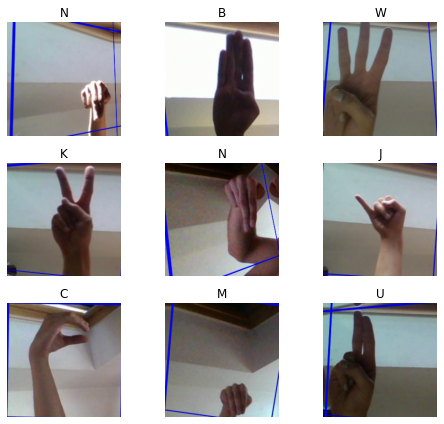

In [8]:
data.show_batch(rows=3, figsize=(7,6))

## Entrainer le réseau

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(1)

In [0]:
learn.save('training_resnet50_OneCycle')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

 Tracer la Matrice de confusion

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=100)

Montrer les signes les plus confus

In [0]:
interp.most_confused(min_val=2)

[('N', 'M', 8),
 ('M', 'N', 3),
 ('R', 'U', 3),
 ('E', 'S', 2),
 ('J', 'I', 2),
 ('U', 'R', 2),
 ('W', 'V', 2),
 ('X', 'U', 2)]

Exportation du model entrainé précedement 

In [0]:
learn=load_learner(path)

In [0]:
learn

In [0]:
img_path=Path('/content/gdrive/My Drive/asl_alph/asl_alphabet++/test_A/U.JPG')
img_path

In [0]:
im = open_image(img_path)
learn.predict(im)

# Introduction du module d'acquisition de l'image 

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Reconnaitre le signe';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Effectuer une prédiction

<IPython.core.display.Javascript object>

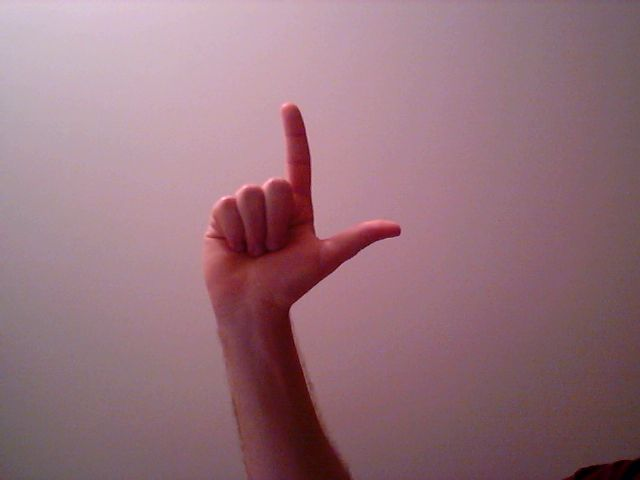


*******************
 Detection  :  L 
*******************


<IPython.core.display.Javascript object>

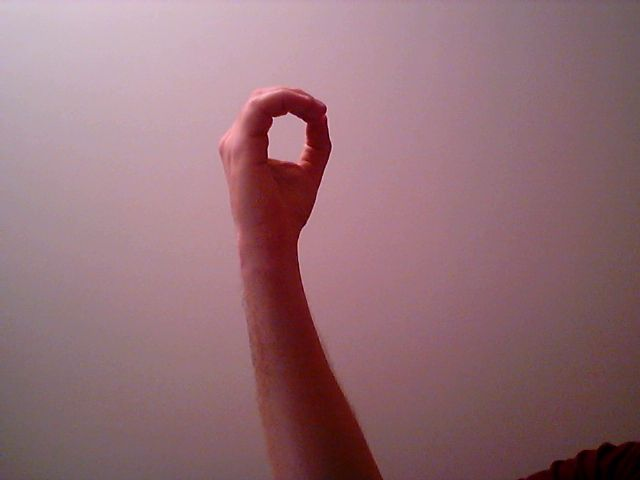


*******************
 Detection  :  O 
*******************


<IPython.core.display.Javascript object>

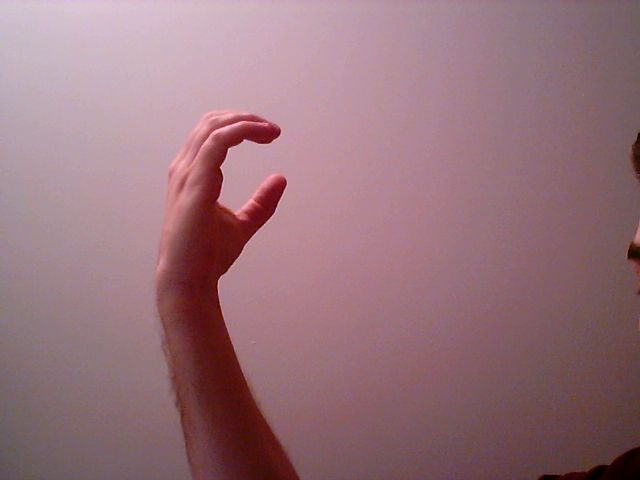


*******************
 Detection  :  C 
*******************


<IPython.core.display.Javascript object>

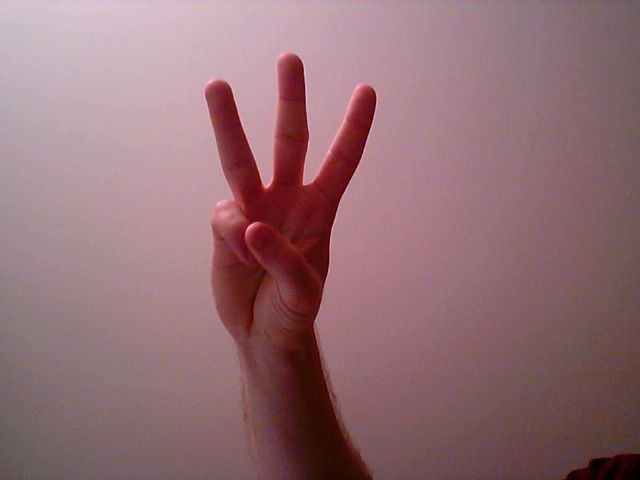


*******************
 Detection  :  W 
*******************


<IPython.core.display.Javascript object>

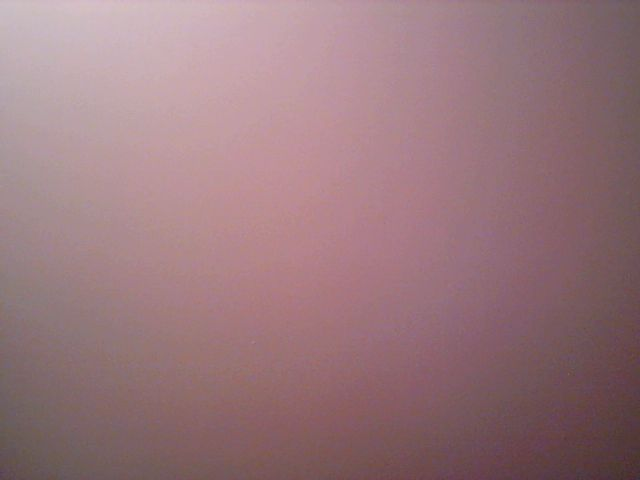


*******************
 Detection  :  nothing 
*******************


<IPython.core.display.Javascript object>

In [0]:
 count=0
 from IPython.display import Image
 
   # Show the image which was just taken.
while count<20 :
    try:
     filename = take_photo()
     display(Image(filename))
     im = open_image('/content/photo.jpg')
     learn.predict(im)
     print("\n*******************\n Detection  : ",learn.predict(im)[0],"\n*******************")
     count=count+1
    except Exception as err:
   # Errors will be thrown if the user does not have a webcam or if they do not
   # grant the page permission to access it.
     print(str(err))